In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X=np.random.uniform(5,15,100)
Y=5*np.sin(X) + 23*(np.cos(X))**2 + np.random.normal(0,5,100)

In [3]:
Sim_1=pd.DataFrame({'X':X, 'Y':Y})

In [4]:
def reg(x):
    val=5*np.sin(x) + 23*(np.cos(x))**2
    return val

In [5]:
x_train,y_train=X[0:80],Y[0:80]
x_test,y_test=X[80:],Y[80:]

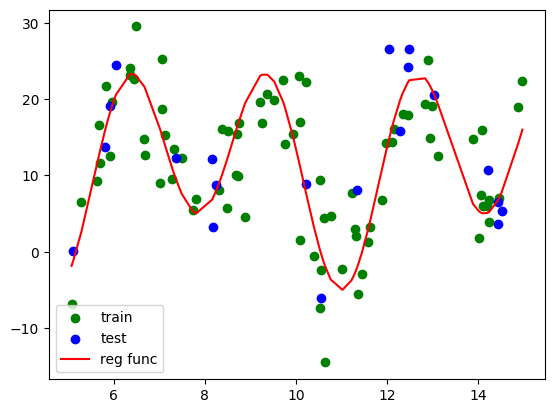

In [6]:
plt.scatter(x_train,y_train,color="green",label="train")
plt.scatter(x_test,y_test,color="blue",label="test")

sorted_indices=X.argsort()
X_curve=X[sorted_indices]
Y_curve=reg(X_curve)
plt.plot(X_curve, Y_curve,color="red",label="reg func")

plt.legend()

In [7]:
a=X[X.argmin()]
b=X[X.argmax()]

In [8]:
def Bin_Smoother(x0,a,b,k):
    size=(b-a)/k
    count=0
    for i in range(k):
        l=a + i*size
        count+=1
        if x0>=l and x0<l+size:
            break

    local_ls=[]
    for i in range(len(Sim_1)):
        x_comp=Sim_1.iloc[i,0]
    
        if (a+size*count)==b:
            if x_comp>=(a+size*(count-1)) and x_comp<=(a+size*count):
                local_ls.append(Sim_1.iloc[i,1])
        else:
            if x_comp>=(a+size*(count-1)) and x_comp<(a+size*count):
                local_ls.append(Sim_1.iloc[i,1])
            
    return np.mean(local_ls)

In [9]:
from sklearn.metrics import mean_squared_error

train_mse=[]
test_mse=[]
k_values=[2,5,10,20]

for k in k_values:
    y_hat_train=[]
    y_hat_test=[]
    
    for x in x_train:
        y_hat_train.append(Bin_Smoother(x,a,b,k))

    for x in x_test:
        y_hat_test.append(Bin_Smoother(x,a,b,k))

    train_M=np.mean(np.sum((y_hat_train-y_train)**2))
    test_M=np.mean(np.sum((y_hat_test-y_test)**2))

    train_mse.append(train_M)
    test_mse.append(test_M)

In [10]:
print(train_mse,test_mse)

[np.float64(5383.998735933998), np.float64(5753.028162802899), np.float64(3575.608126844837), np.float64(2116.508059731773)] [np.float64(1738.9468370453453), np.float64(1437.677881520743), np.float64(751.6266710943602), np.float64(469.60722262537433)]
